<a href="https://colab.research.google.com/github/mrunallll/Deep-Learning-exercises-mini-projects/blob/main/Coronary_Artery_Disease_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coronary Artery Disease (CAD) can cause Sudden Cardiac Deaths (SCDs) or even Sudden Cardiac Arrests. Unrecognized CAD can prove to be fatal for a patient.

In [26]:
import sys
import pandas as pd
import numpy as np
import sklearn
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
#Importing the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [11]:
cols = ['Age','Sex', 'cp', 'trestbps', 'cholestrol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class']
data = pd.read_csv(url, names=cols)

In [12]:
data.head()

,Age,Sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
print('Shape of DataFrame: {}'.format(data.shape))

Shape of DataFrame: (303, 14)
Age            56
Sex             1
cp              2
trestbps      120
cholestrol    236
fbs             0
restecg         0
thalach       178
exang           0
oldpeak       0.8
slope           1
ca            0.0
thal          3.0
class           0
Name: 5, dtype: object


In [29]:
#Missing data (indicated with a "?")
data = data[~data.isin(['?'])]
data = data.dropna(axis=0)

In [31]:
print(data.dtypes)

Age           float64
Sex           float64
cp            float64
trestbps      float64
cholestrol    float64
fbs           float64
restecg       float64
thalach       float64
exang         float64
oldpeak       float64
slope         float64
ca             object
thal           object
class           int64
dtype: object


In [34]:
data = data.apply(pd.to_numeric)
data.dtypes

Age           float64
Sex           float64
cp            float64
trestbps      float64
cholestrol    float64
fbs           float64
restecg       float64
thalach       float64
exang         float64
oldpeak       float64
slope         float64
ca            float64
thal          float64
class           int64
dtype: object

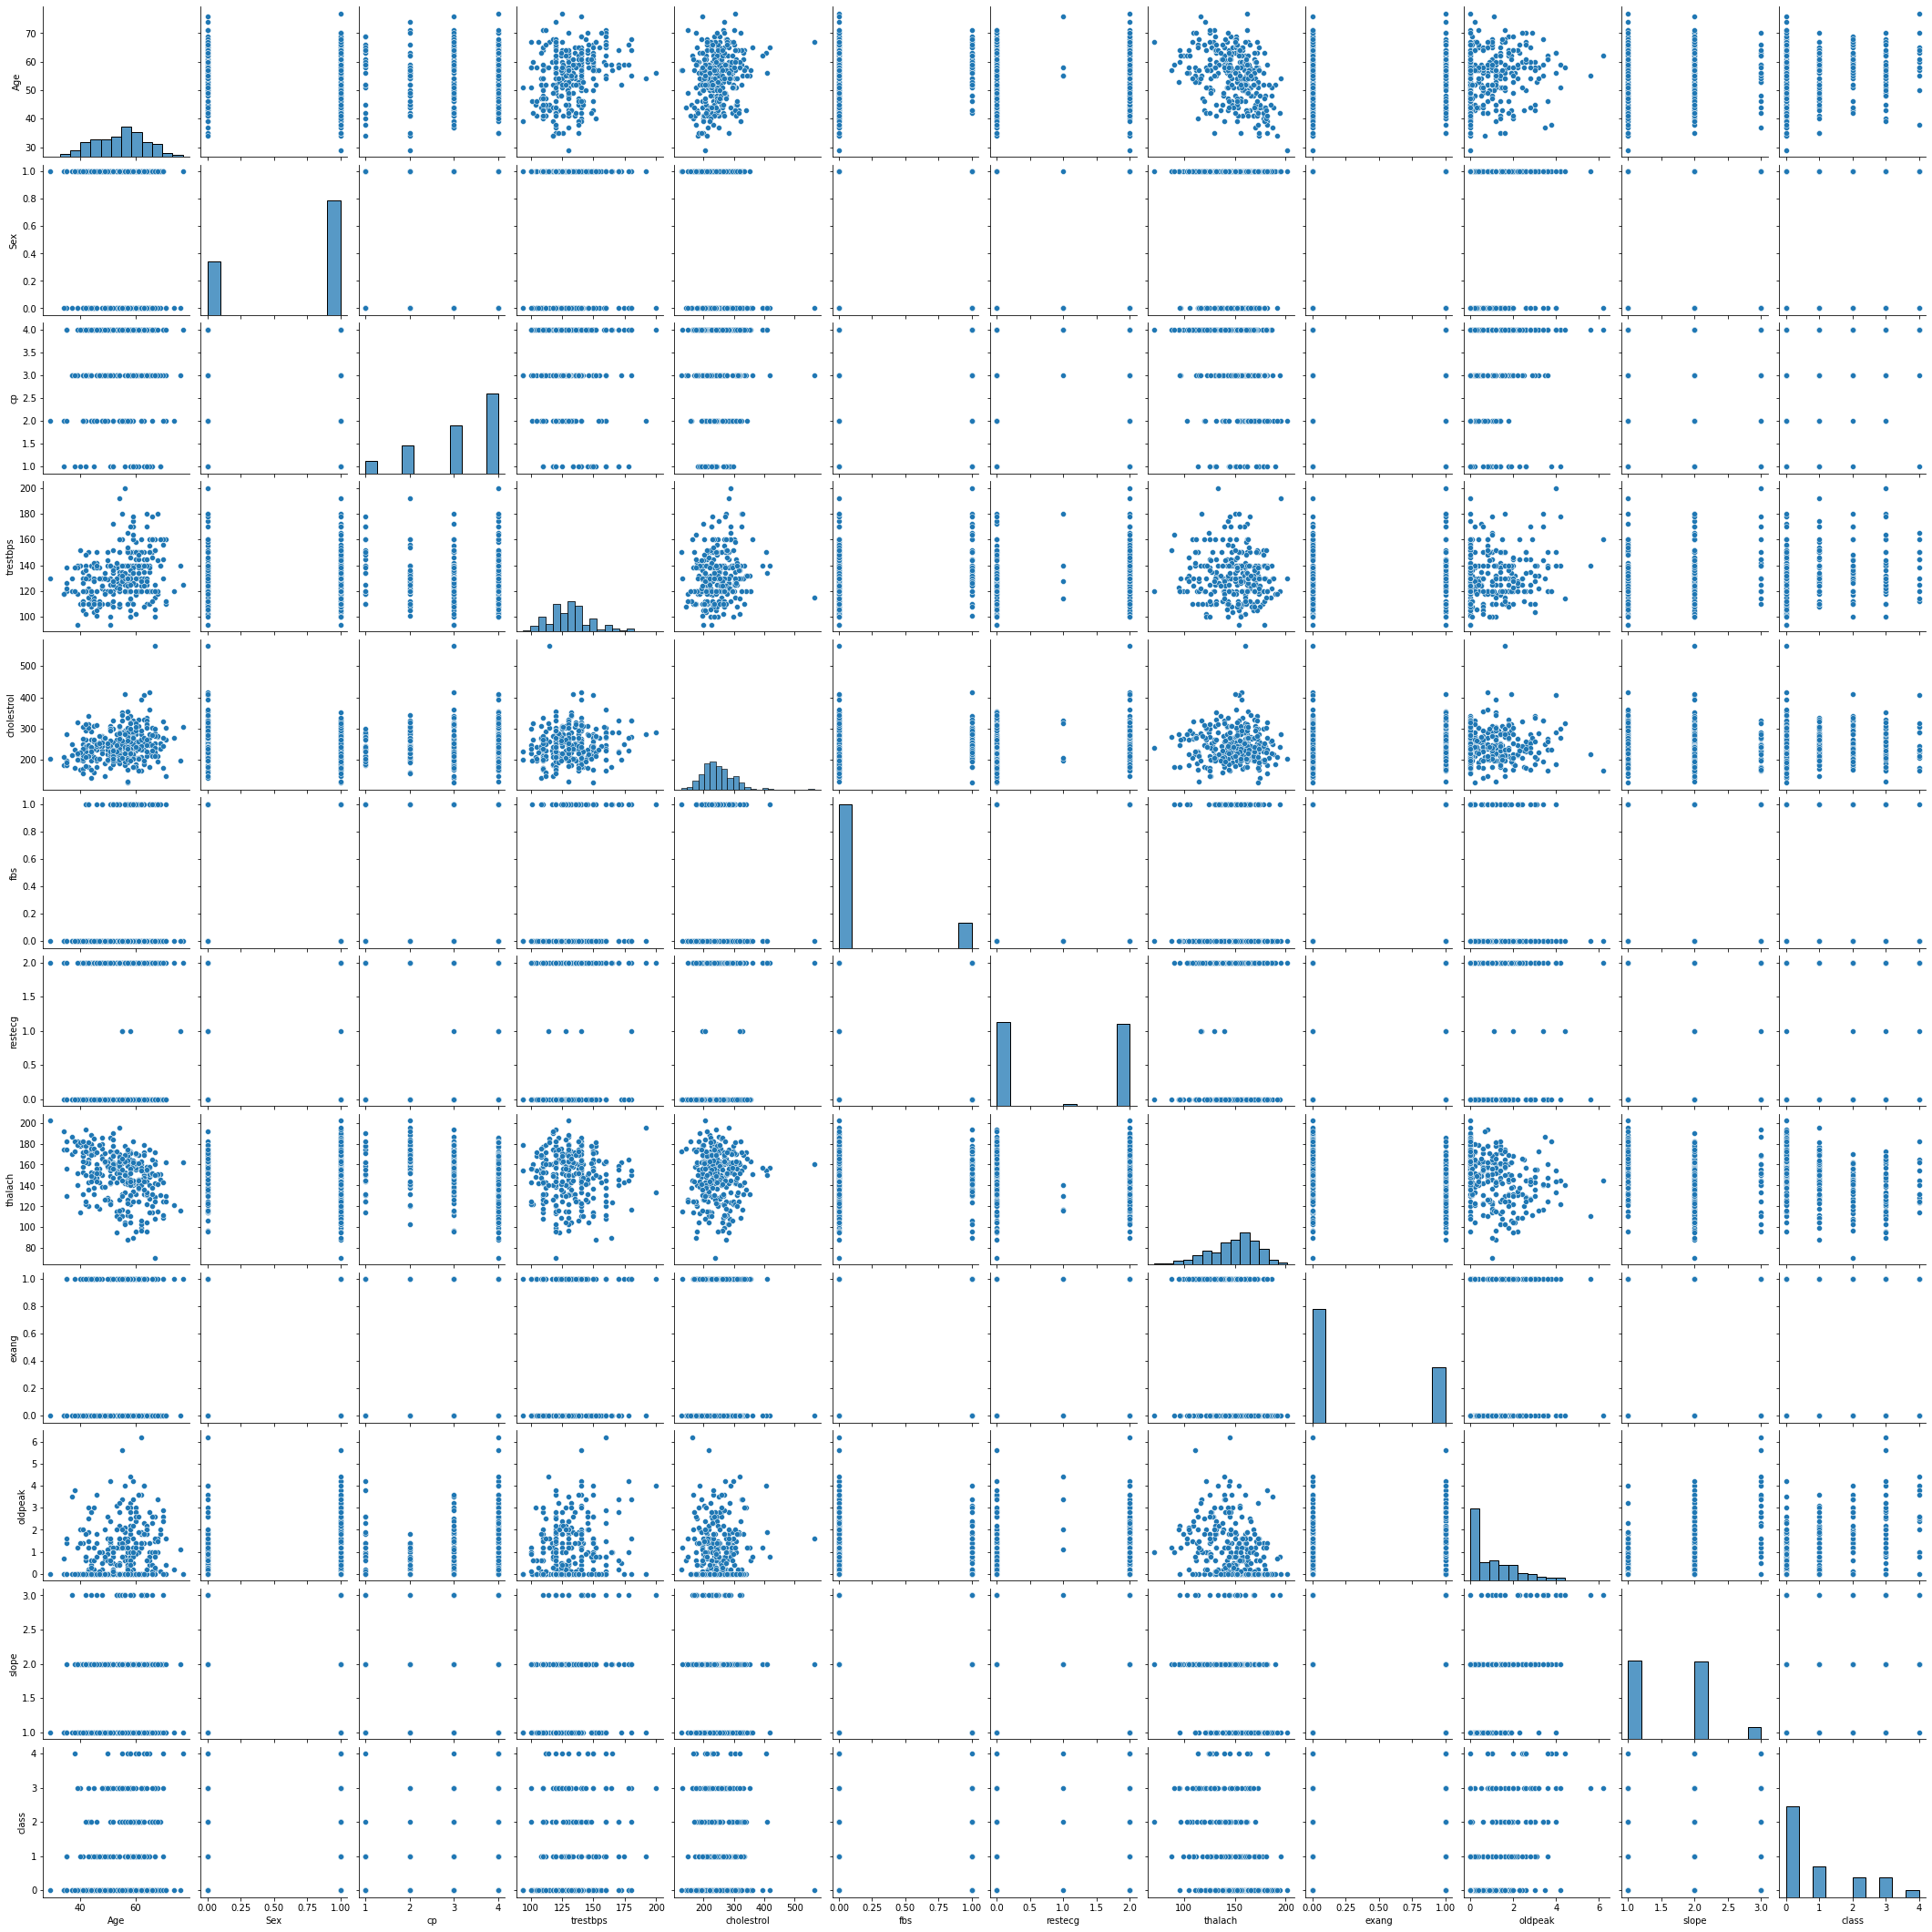

In [28]:
sns.pairplot(data)

In [35]:
data.describe()

,Age,Sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         297 non-null    float64
 1   Sex         297 non-null    float64
 2   cp          297 non-null    float64
 3   trestbps    297 non-null    float64
 4   cholestrol  297 non-null    float64
 5   fbs         297 non-null    float64
 6   restecg     297 non-null    float64
 7   thalach     297 non-null    float64
 8   exang       297 non-null    float64
 9   oldpeak     297 non-null    float64
 10  slope       297 non-null    float64
 11  ca          297 non-null    float64
 12  thal        297 non-null    float64
 13  class       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [37]:
from sklearn import model_selection

X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [39]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)


In [40]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [46]:
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
binary_model.fit(X_train, Y_train_binary, epochs=30, batch_size=10, verbose = 1)

Epoch 1/30
24/24 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8692
Epoch 2/30
24/24 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8270
Epoch 3/30
24/24 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8270
Epoch 4/30
24/24 [==============================] - 0s 1ms/step - loss: 0.3497 - accuracy: 0.8650
Epoch 5/30
24/24 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8565
Epoch 6/30
24/24 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8101
Epoch 7/30
24/24 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8143
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8565
Epoch 9/30
24/24 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8270
Epoch 10/30
24/24 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8650
Epoch 11/30
24/24 [

In [54]:
from sklearn.metrics import classification_report, accuracy_score

binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.7166666666666667
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        33
           1       0.69      0.67      0.68        27

    accuracy                           0.72        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60

